<a href="https://colab.research.google.com/github/santhosh2551991/Perumagalur/blob/master/MachineLearningLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gensim

In [0]:
from gensim.models import Word2Vec

In [0]:
sentences=[['this','is','first','statement'],['this','is','second','statement']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


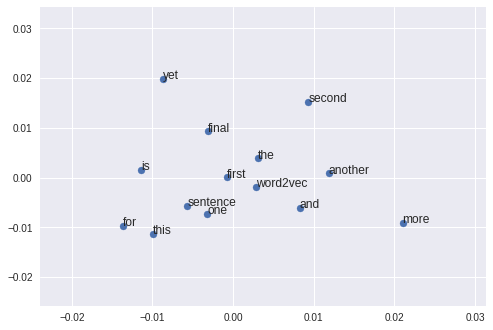

In [0]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [0]:
from google.colab import files
uploaded = files.upload()


Saving GOOG (3).csv to GOOG (3).csv


In [1]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
!ls "/content/drive/My Drive"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
 01.jpg
 987.jpg
'Apache Hive Cookbook.pdf'
'Colab Notebooks'
 Data
 e-books
 FB_IMG_1441862195824.jpg
 HDFS_AS_COMICS.pdf
 Hive
 hive_f_e_modes_str_date_functions.txt
 Hive_optimization.txt
 import_mapreduce_project_into_eclipse.mp4
 Inceptez_Banking_insurance_project2-20190209T152906Z-001.zip
 Inceptez_Datalake_Projec3.rar
 Inceptez_sentiment_project1.tar.gz
 metabook.txt
 MR-Workouts
 notes.docx
 notes.txt
 OOZIE
 Orginal.csv
 Pig
 RegNo_20302460.pdf
 sampl

In [0]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [0]:
!ls

drive	     telco-customer-churn.zip
sample_data  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [32]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Orginal.csv')
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label_encoder = LabelEncoder()
#df.to_csv('/content/drive/My Drive/Orginal.csv',index=False)
df.drop(['customerID'], axis=1, inplace=True)
df['gender']= label_encoder.fit_transform(df['gender'])
df['Partner']= label_encoder.fit_transform(df['Partner'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])
df = pd.concat([df,pd.get_dummies(df['MultipleLines'],prefix='MultipleLines')],axis=1)
df.drop(['MultipleLines'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['InternetService'],prefix='InternetService')],axis=1)
df.drop(['InternetService'],axis=1, inplace=True)
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])
df = pd.concat([df,pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod')],axis=1)
df.drop(['PaymentMethod'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['StreamingTV'],prefix='StreamingTV')],axis=1)
df.drop(['StreamingTV'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['StreamingMovies'],prefix='StreamingMovies')],axis=1)
df.drop(['StreamingMovies'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['Contract'],prefix='Contract')],axis=1)
df.drop(['Contract'],axis=1, inplace=True)
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])
df['TotalCharges']=df['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])
df['Churn']= label_encoder.fit_transform(df['Churn'])
df1=df[df.Churn==0]
df1.count()

gender                                     5174
SeniorCitizen                              5174
Partner                                    5174
Dependents                                 5174
tenure                                     5174
PhoneService                               5174
OnlineSecurity                             5174
OnlineBackup                               5174
DeviceProtection                           5174
TechSupport                                5174
PaperlessBilling                           5174
MonthlyCharges                             5174
TotalCharges                               5174
Churn                                      5174
MultipleLines_No                           5174
MultipleLines_No phone service             5174
MultipleLines_Yes                          5174
InternetService_DSL                        5174
InternetService_Fiber optic                5174
InternetService_No                         5174
PaymentMethod_Bank transfer (automatic) 

In [0]:
x=df.loc[:, df.columns != 'Churn']
y=df.loc[:, df.columns == 'Churn']
x=x.values
y=y.values


In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn import datasets
import numpy 
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 1)
#numpy.random.seed[7]
#dataset=datasets.load_boston()
#x_train=dataset[:,0:8]
#y_train=dataset[:,8]
#dataset
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(Dense(128,input_dim=32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xTrain, yTrain,batch_size=5, epochs=150)
scores=model.evaluate(xTrain,yTrain)
print("\n%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

Epoch 1/150
4930/4930 [==============================] - 6s 1ms/step - loss: 4.0631 - acc: 0.6517
Epoch 2/150
4930/4930 [==============================] - 5s 1ms/step - loss: 1.9697 - acc: 0.7294
Epoch 3/150
4930/4930 [==============================] - 6s 1ms/step - loss: 0.5602 - acc: 0.7684
Epoch 4/150
4930/4930 [==============================] - 6s 1ms/step - loss: 0.5346 - acc: 0.7677
Epoch 5/150
4930/4930 [==============================] - 6s 1ms/step - loss: 0.5304 - acc: 0.7673
Epoch 6/150
4930/4930 [==============================] - 5s 1ms/step - loss: 0.5244 - acc: 0.7718
Epoch 7/150
4930/4930 [==============================] - 6s 1ms/step - loss: 0.5202 - acc: 0.7700
Epoch 8/150
4930/4930 [==============================] - 6s 1ms/step - loss: 0.5174 - acc: 0.7698
Epoch 9/150
4930/4930 [==============================] - 6s 1ms/step - loss: 0.5027 - acc: 0.7744
Epoch 10/150
4930/4930 [==============================] - 6s 1ms/step - loss: 0.4997 - acc: 0.7795
Epoch 11/150
4930/4

In [30]:
import numpy as np
predicted=model.predict(xTest)
np.mean(np.square(xTrain-yTrain))
#predicted=(predicted>0.5)
#predicted.count()]
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
#cm = confusion_matrix(yTest, predicted) 
#cm
import matplotlib.pyplot as plt
import pandas
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import preprocessing 
#xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)
linearRegressor = LogisticRegression()
#print(x)
linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)
#print('Intercept: \n', linearRegressor.intercept_)
#print('Coefficients: \n', linearRegressor.coef_)
#confusion_matrix(yTest,yPrediction)
pred=[yPrediction>0.5]
np.count_nonzero(pred)
#np.mean(np.square(yTest-yPrediction))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


476

In [23]:
#np.count_nonzero(True)
import numpy as np
yPrediction = model.predict(xTest)
#print('Intercept: \n', linearRegressor.intercept_)
#print('Coefficients: \n', linearRegressor.coef_)
#confusion_matrix(yTest,yPrediction)
pred=[yPrediction>0.5]
np.count_nonzero(pred)
#np.count_nonzero([[True,False,True,True]])
#np.mean(np.square(yTest-yPrediction))

309